In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

red_wine = pd.read_csv('data/winequality-red.csv')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [5]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
white_wine.shape, red_wine.shape

((4898, 12), (1599, 12))

In [12]:
wine = pd.concat([white_wine.assign(kind='white'), red_wine.assign(kind='red')])
wine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
1997,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,6,white
4375,6.0,0.32,0.32,4.8,0.041,40.0,186.0,0.99235,3.22,0.54,11.0,6,white
1179,7.2,0.20,0.25,4.5,0.044,31.0,109.0,0.99490,3.23,0.36,9.4,5,white
3017,5.9,0.34,0.30,3.8,0.035,57.0,135.0,0.99016,3.09,0.34,12.0,6,white
3926,6.9,0.14,0.29,9.9,0.056,30.0,91.0,0.99512,3.19,0.33,9.9,6,white


In [15]:
from sklearn.model_selection import train_test_split

#y = wine.pop('quality')
x= wine

x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.25, random_state=0, stratify=y
)

In [16]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [17]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,kind
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,white


In [25]:
%%capture
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline = Pipeline([
    ('transformer', ColumnTransformer([('scale', StandardScaler(), slice(0,-1)), ('encoder', OneHotEncoder(), [-1])])),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=0))
])

search_space = {'rf__max_depth': np.arange(5,20,4)}

grid = GridSearchCV(pipeline, search_space, scoring='f1_macro', cv=5).fit(x_train, y_train)


In [48]:
grid.best_estimator_ # refering to pipeline

Pipeline(memory=None,
     steps=[('transformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True), slice(0, -1, None)), ('encoder', OneHotEncoder(categorical_features=None, catego...mators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [27]:
grid.best_params_

{'rf__max_depth': 17}

In [43]:
encoded_labels = grid.best_estimator_.named_steps['transformer'].named_transformers_['encoder'].get_feature_names()

importance = pd.DataFrame({
    'feature': np.concatenate([x.columns[:-1], encoded_labels]),
    'importance': grid.best_estimator_.named_steps['rf'].feature_importances_

}).set_index('feature').sort_values(by='importance', ascending=False)

importance

,importance
feature,
alcohol,0.123852
density,0.100688
volatile acidity,0.098092
total sulfur dioxide,0.091125
chlorides,0.086917
residual sugar,0.085069
free sulfur dioxide,0.084878
sulphates,0.084531
pH,0.083881


In [47]:
importance.importance.sum()

1.0

In [49]:
preds = grid.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       1.00      0.13      0.23        54
           5       0.71      0.69      0.70       535
           6       0.63      0.78      0.69       709
           7       0.68      0.52      0.59       270
           8       0.94      0.35      0.52        48
           9       0.00      0.00      0.00         1

   micro avg       0.67      0.67      0.67      1625
   macro avg       0.57      0.35      0.39      1625
weighted avg       0.68      0.67      0.65      1625



c:\users\korze\desktop\python\hands-on\book_venv\book_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\korze\desktop\python\hands-on\book_venv\book_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\korze\desktop\python\hands-on\book_venv\book_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


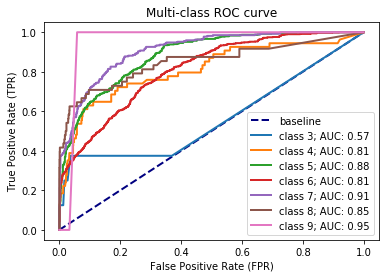

In [54]:
from ml_utils.classification import plot_multi_class_roc, confusion_matrix_visual

plot_multi_class_roc(y_test, grid.predict_proba(x_test))

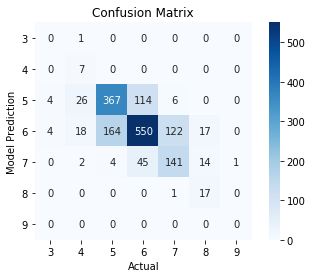

In [57]:
confusion_matrix_visual(y_test, preds, np.sort(y_test.unique()))